In [2]:
from sklearn import datasets,metrics,svm 
from sklearn.model_selection import train_test_split
import pandas as pd 

p = './winequality_white.csv'
data = pd.read_csv(p)

print(data.columns)

y = data['quality'].values
X = data.drop(['quality'],axis=1).values
#print(X.columns)

#print(y.unique())
ind = (y>=3) & (y<=4)
y[ind]=0
ind = (y>=5) & (y<=8)
y[ind]=1
ind = (y>=9)
y[ind]=2

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:

Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3,random_state=2)

svmModel = svm.SVC(kernel = 'linear',degree=3, max_iter=-1,decision_function_shape='ovr',C=1,gamma='scale')
svmModel = svmModel.fit(Xtrain,ytrain)

yp = svmModel.predict(Xtest)

acc = metrics.accuracy_score(yp,ytest)
print('Accuracy with linear kernel: ',acc)


Accuracy with linear kernel:  0.9619047619047619


In [4]:
import numpy as np
import pandas as pd

ratio= [0.5,0.3,0.2]
kernel=['rbf','linear','poly']
result = np.zeros((len(kernel),len(ratio)))

for i in range(len(ratio)):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=ratio[i],random_state=2)
    for j in range(len(kernel)):
        svmModel = svm.SVC(kernel = kernel[j],degree=3, max_iter=-1,decision_function_shape='ovr',C=1, gamma='scale')
        svmModel = svmModel.fit(Xtrain,ytrain)
        yp = svmModel.predict(Xtest)
        acc = metrics.accuracy_score(yp,ytest)
        result[i,j]=acc*100
                   
resultFrame = pd.DataFrame(result,index = ratio,columns=kernel)
print(resultFrame)


           rbf     linear       poly
0.5  96.243365  96.243365  96.243365
0.3  96.190476  96.190476  96.190476
0.2  96.122449  96.122449  96.122449


<AxesSubplot:>

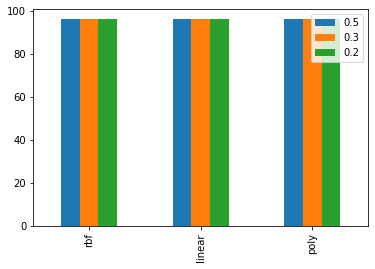

In [5]:
resultFrame.T.plot(kind = 'bar')